# ⚙️ Perceptron Classifier

This notebook demonstrates how to use the **Perceptron** algorithm from **scikit-learn** to classify machines as **Faulty** or **Healthy** based on sensor data.

We'll cover:
1. Introduction to the Perceptron model
2. Training and testing using a **synthetic dataset**
3. Applying it to a **real predictive maintenance dataset**
4. Evaluating performance using accuracy, precision, recall, F1-score, and ROC curve

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc)
plt.style.use('seaborn-v0_8-colorblind')

## 1️⃣ Synthetic Dataset Example

In [2]:
data = {
    'vibration': [9.8, 9.2, 7.5, 8.9, 1.8, 2.5, 2.2, 2.8],
    'temperature': [105, 110, 98, 102, 65, 75, 70, 72],
    'acoustic': [78, 74, 80, 72, 42, 48, 45, 50],
    'class': ['Faulty', 'Faulty', 'Faulty', 'Faulty', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
}
df_synth = pd.DataFrame(data)
df_synth

,vibration,temperature,acoustic,class
0,9.8,105,78,Faulty
1,9.2,110,74,Faulty
2,7.5,98,80,Faulty
3,8.9,102,72,Faulty
4,1.8,65,42,Healthy
5,2.5,75,48,Healthy
6,2.2,70,45,Healthy
7,2.8,72,50,Healthy


In [6]:
le = LabelEncoder()
df_synth['label'] = le.fit_transform(df_synth['class'])
X = df_synth[['vibration', 'temperature', 'acoustic']]
y = df_synth['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

Accuracy:  1.000
Precision: 1.000
Recall:    1.000
F1-score:  1.000


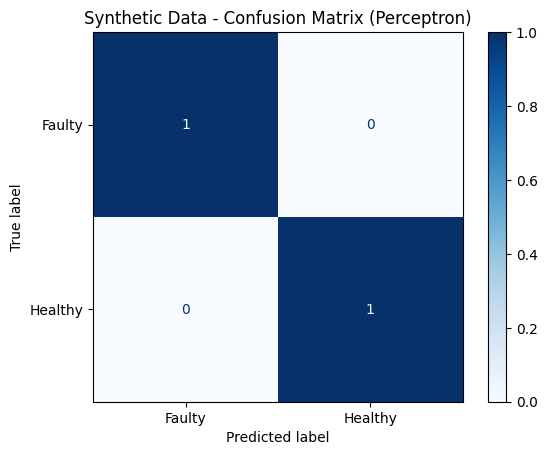

In [7]:
perceptron = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy:  {acc:.3f}\nPrecision: {prec:.3f}\nRecall:    {rec:.3f}\nF1-score:  {f1:.3f}")

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot(cmap='Blues')
plt.title('Synthetic Data - Confusion Matrix (Perceptron)')
plt.show()

## 2️⃣ Real Predictive Maintenance Dataset

In [4]:
url = 'https://raw.githubusercontent.com/Dr-AlaaKhamis/ISE518/refs/heads/main/datasets/predictive_maintenance.csv'
df_real = pd.read_csv(url)
print('Dataset shape:', df_real.shape)
df_real.head()

Dataset shape: (10000, 10)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [8]:
X = df_real.drop(columns=['UDI', 'Product ID', 'Type', 'Target', 'Failure Type'])
y = df_real['Target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

Accuracy:  0.964
Precision: 0.406
Recall:    0.153
F1-score:  0.222


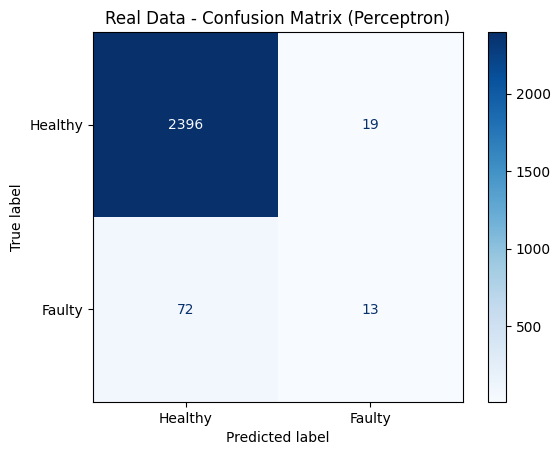

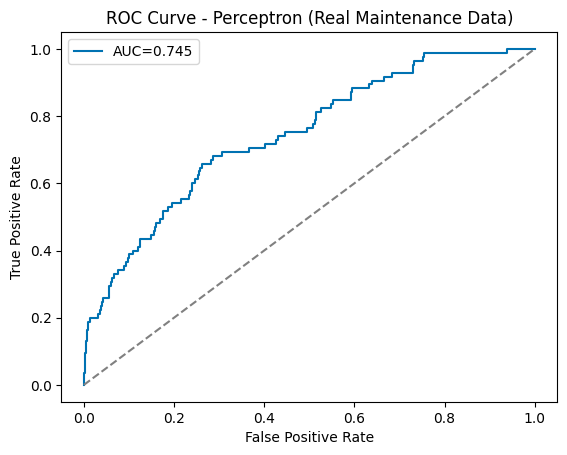

In [9]:
perceptron_real = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
perceptron_real.fit(X_train, y_train)
y_pred = perceptron_real.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy:  {acc:.3f}\nPrecision: {prec:.3f}\nRecall:    {rec:.3f}\nF1-score:  {f1:.3f}")

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Healthy','Faulty']).plot(cmap='Blues')
plt.title('Real Data - Confusion Matrix (Perceptron)')
plt.show()

y_score = perceptron_real.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC={roc_auc:.3f}')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Perceptron (Real Maintenance Data)')
plt.legend()
plt.show()

## ✅ Summary
- The **Perceptron** is a simple, fast, and interpretable linear classifier.
- It can distinguish Healthy vs Faulty machines based on continuous sensor data.
- **Scaling** is crucial for convergence.
- The Perceptron serves as a baseline for more complex neural models in predictive maintenance tasks.